# Mid Term Project
by:
Srini and Denny

<a id='content'>Table of content</a>

<a href='#setup'>setup libraries</a>

<a href='#helper_function'>Helper functions</a>

<a href='#data_functions'>Data Functions</a>

<a href='#raw_data'>Raw Data</a>
<li>
    <a href='#plot_raw'>plot raw data</a>
    <li>
    <a href='#heatmap'>heatmap</a>
    </li>
</li>

Analyze Raw Data 


<a href='#content'>back to content list</a>
<a id='setup'></a> 
### Setup

In [160]:
# import libraries

# dealing with data libs
import pandas as pd
import numpy as np


# dealing with date 
import datetime

# plotting libs
import matplotlib.pyplot as plt
import seaborn as sns

from tqdm.notebook import tqdm # progressbar for looping


# machine learning libs
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.linear_model import LinearRegressio
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

import statsmodels.api as sm





<a href='#content'>back to content list</a>
<a id='helper_function'></a> 
### Helper Functions

In [161]:
# ploting all numerical data from dataframe

def plot_numeric(data):
    for i in data._get_numeric_data():
        fig , ax = plt.subplots(1,2, figsize=(15,7))
        plt.title(i)
        sns.boxplot(x=data[i], ax=ax[0])
        sns.histplot(data[i], ax=ax[1])

        plt.show()

<a id='data_functions'></a>
<a href='#content'>back to content list</a>
### Functions for optional data handling:

#### option 1 Interquartile

In [141]:
# rip data in interquartile range

def reduce_to_interquartile(data: pd.DataFrame, name: list) -> pd.DataFrame:
    Q1 = data[name].quantile(0.25)
    Q3 = data[name].quantile(0.75)
    IQR = Q3 - Q1    #IQR is interquartile range.
    filter = (data[name] >= Q1 - 1.5 * IQR) & (data[name] <= Q3 + 1.5 *IQR)
    data=data.loc[filter] 

    return data

#### option 2 remove

In [144]:
# remove column

def remove_column(data: pd.DataFrame, name: list) -> pd.DataFrame:
    data = data.drop(columns=name, inplace= True)

    return data

#### perform transformation operation on data

In [146]:
# transform operation

def aggregate_powertransform(data: pd.DataFrame, name: list, operation, lamda_value: float)-> pd.DataFrame:
    
    return data


<a id='raw_data'></a>
<a href='#content'>back to content list</a>
### load raw data

In [109]:
# load data and create work_copy

raw_data = pd.read_excel('../data/Data_MidTerm_Project_Real_State_Regression.xls')

work_copy = raw_data.copy()


### Data review

In [139]:
raw_data.dtypes

id                        int64
date             datetime64[ns]
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
price                     int64
dtype: object

<a id='plot_raw'></a>
<a href='#content'>back to content list</a>
### Plotting raw data

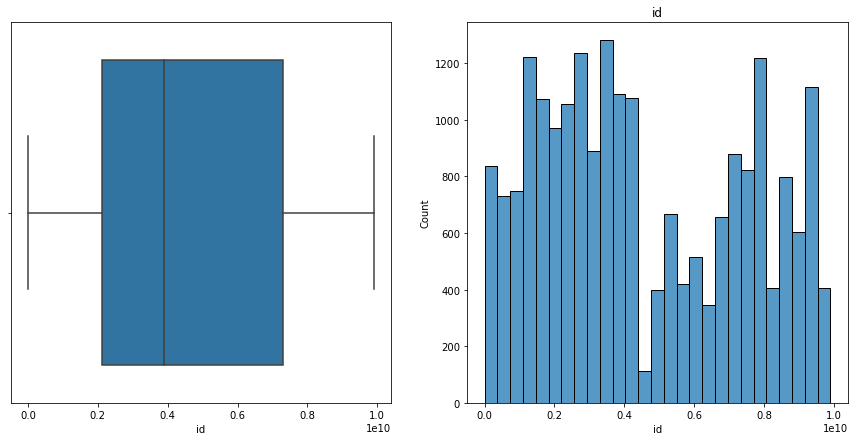

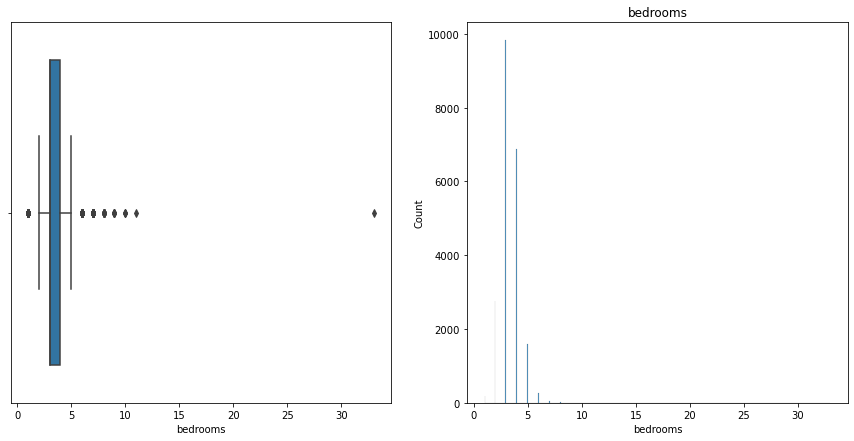

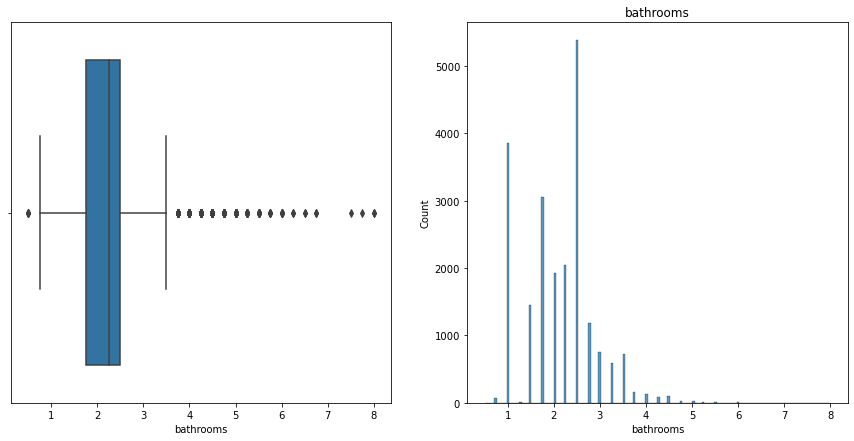

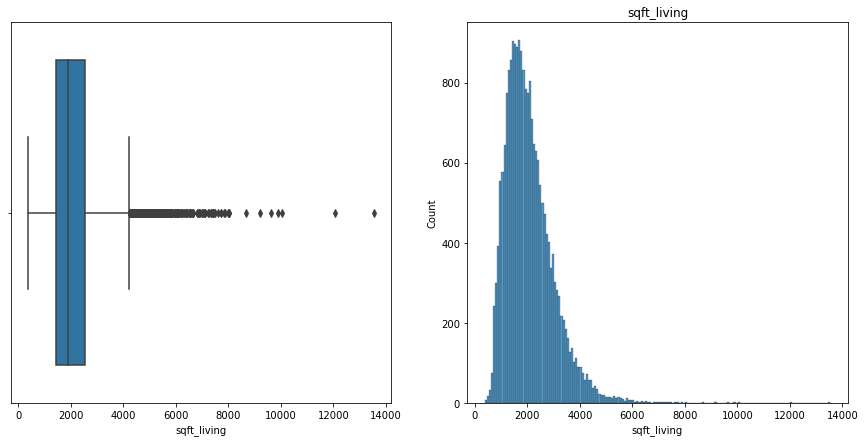

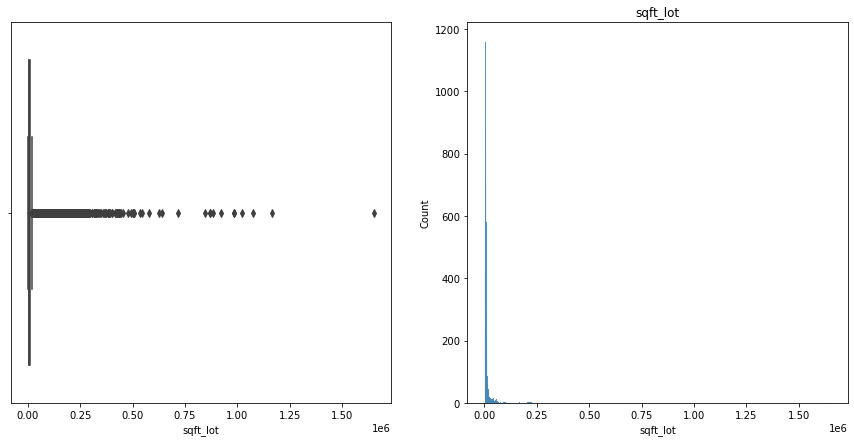

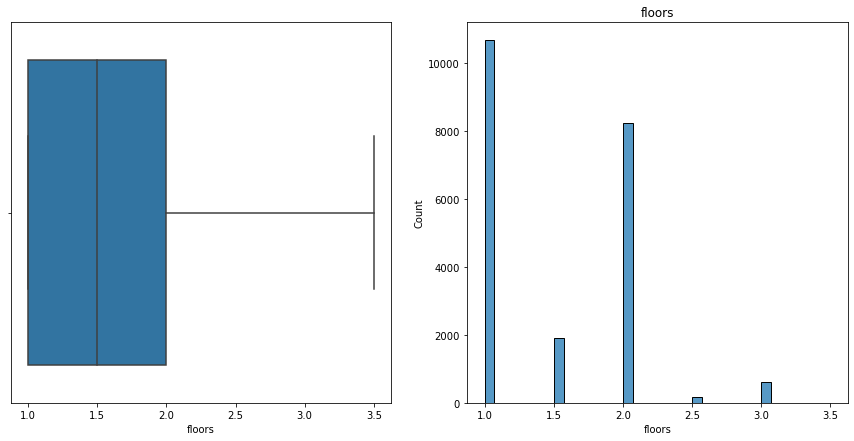

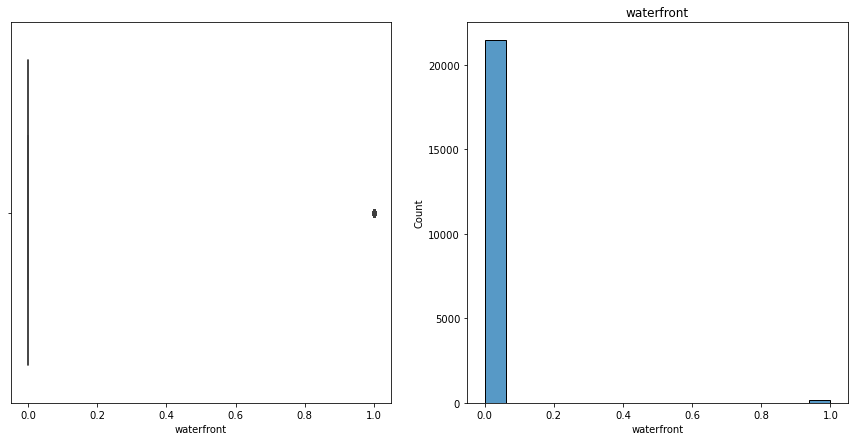

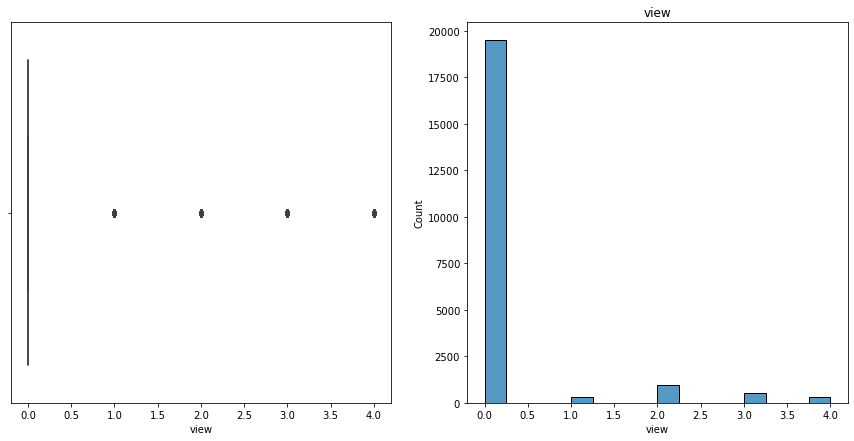

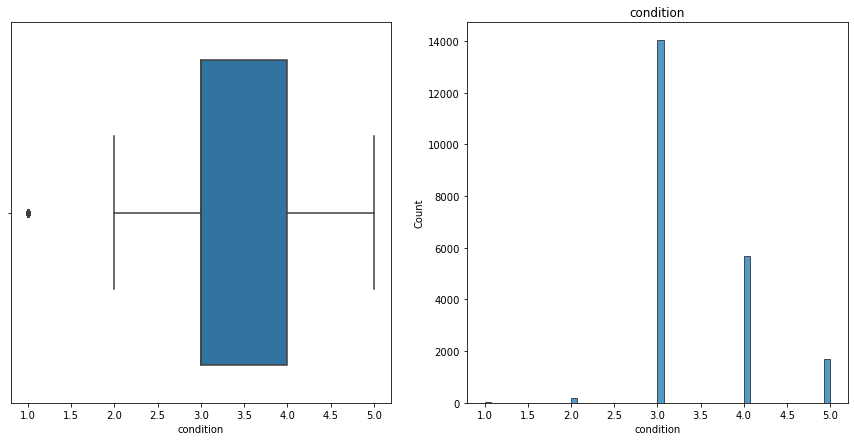

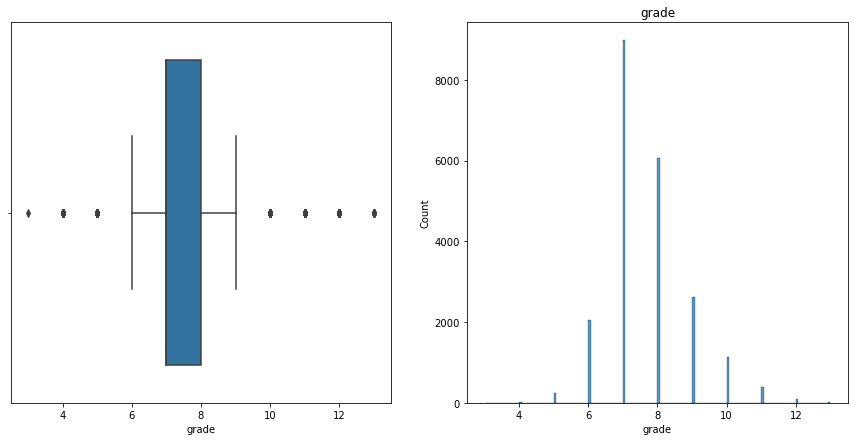

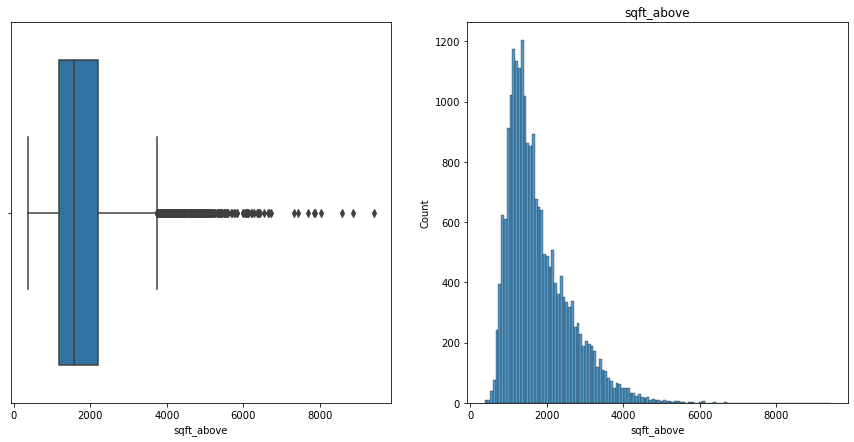

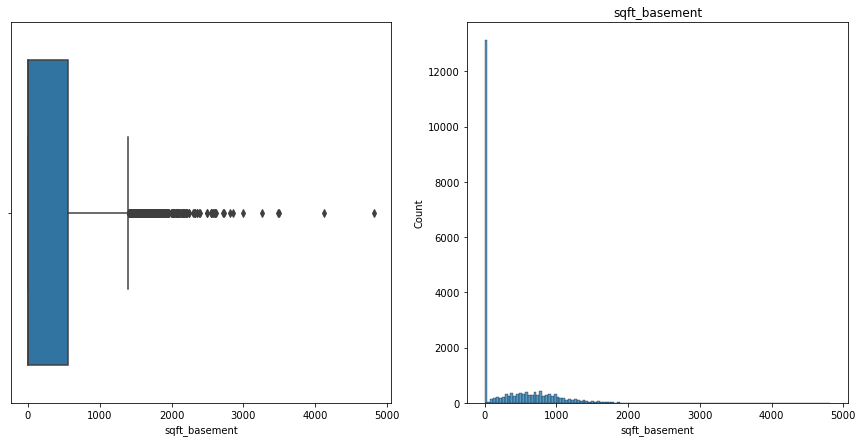

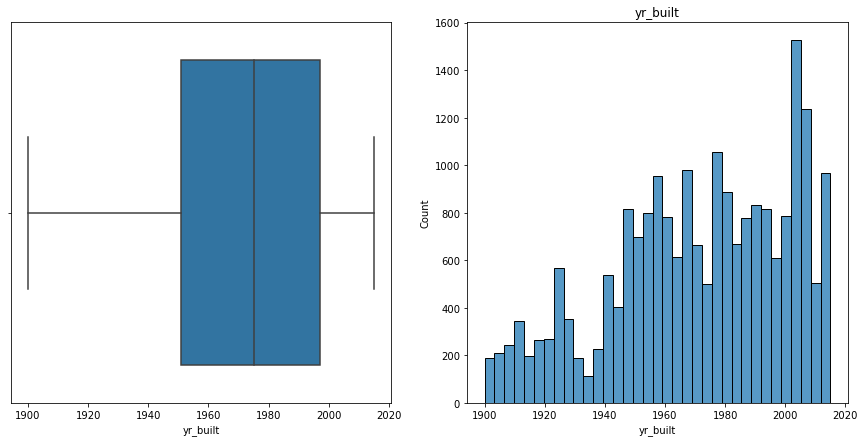

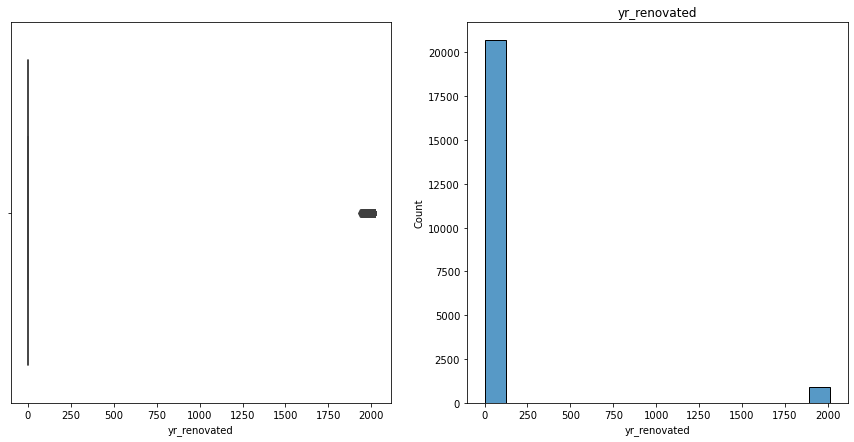

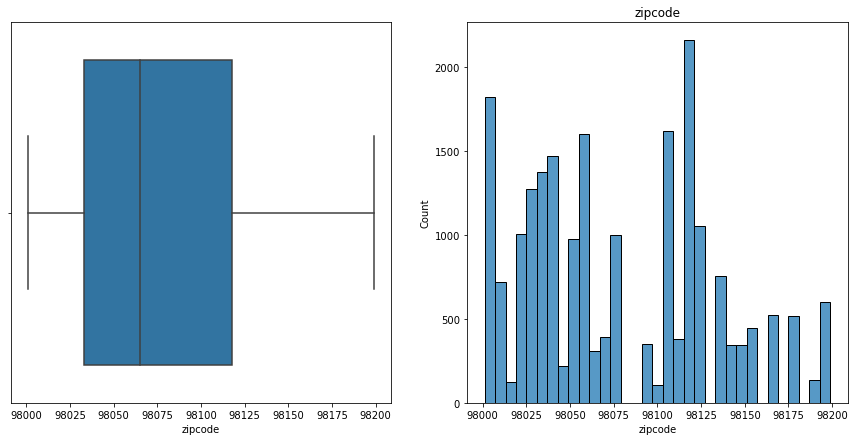

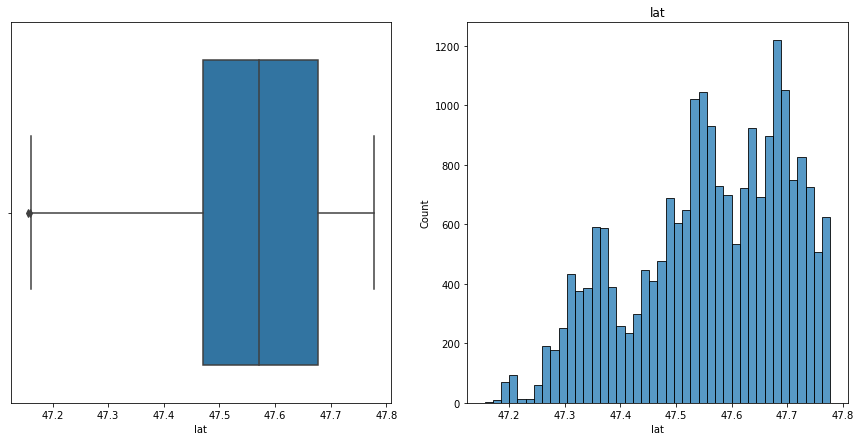

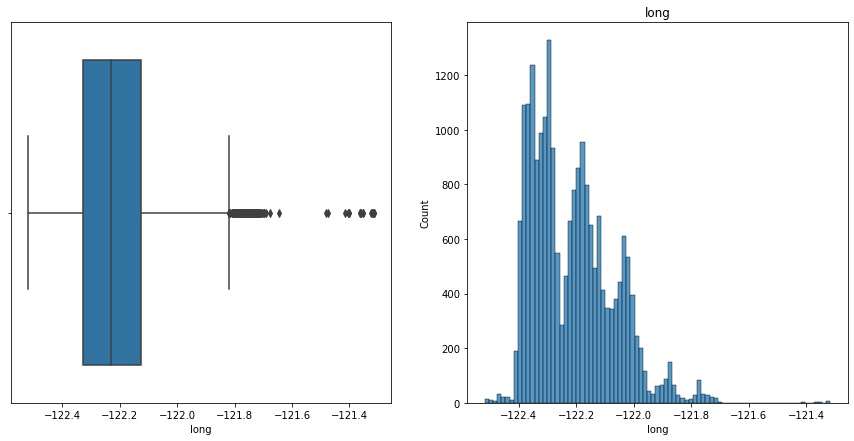

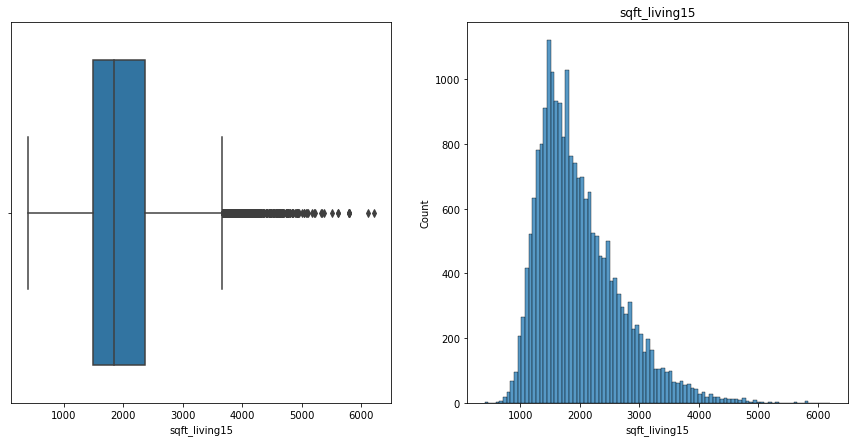

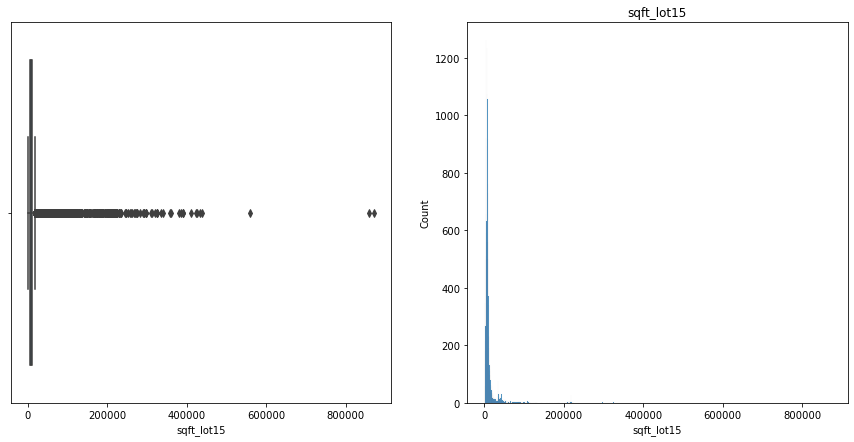

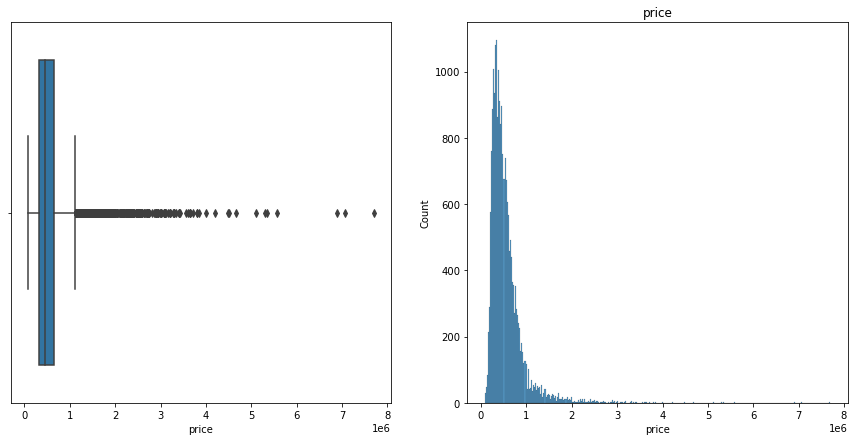

In [110]:
# analyze raw data
plot_numeric(work_copy)

<a id='heatmap'></a>
<a href='#content'>back to content list</a>

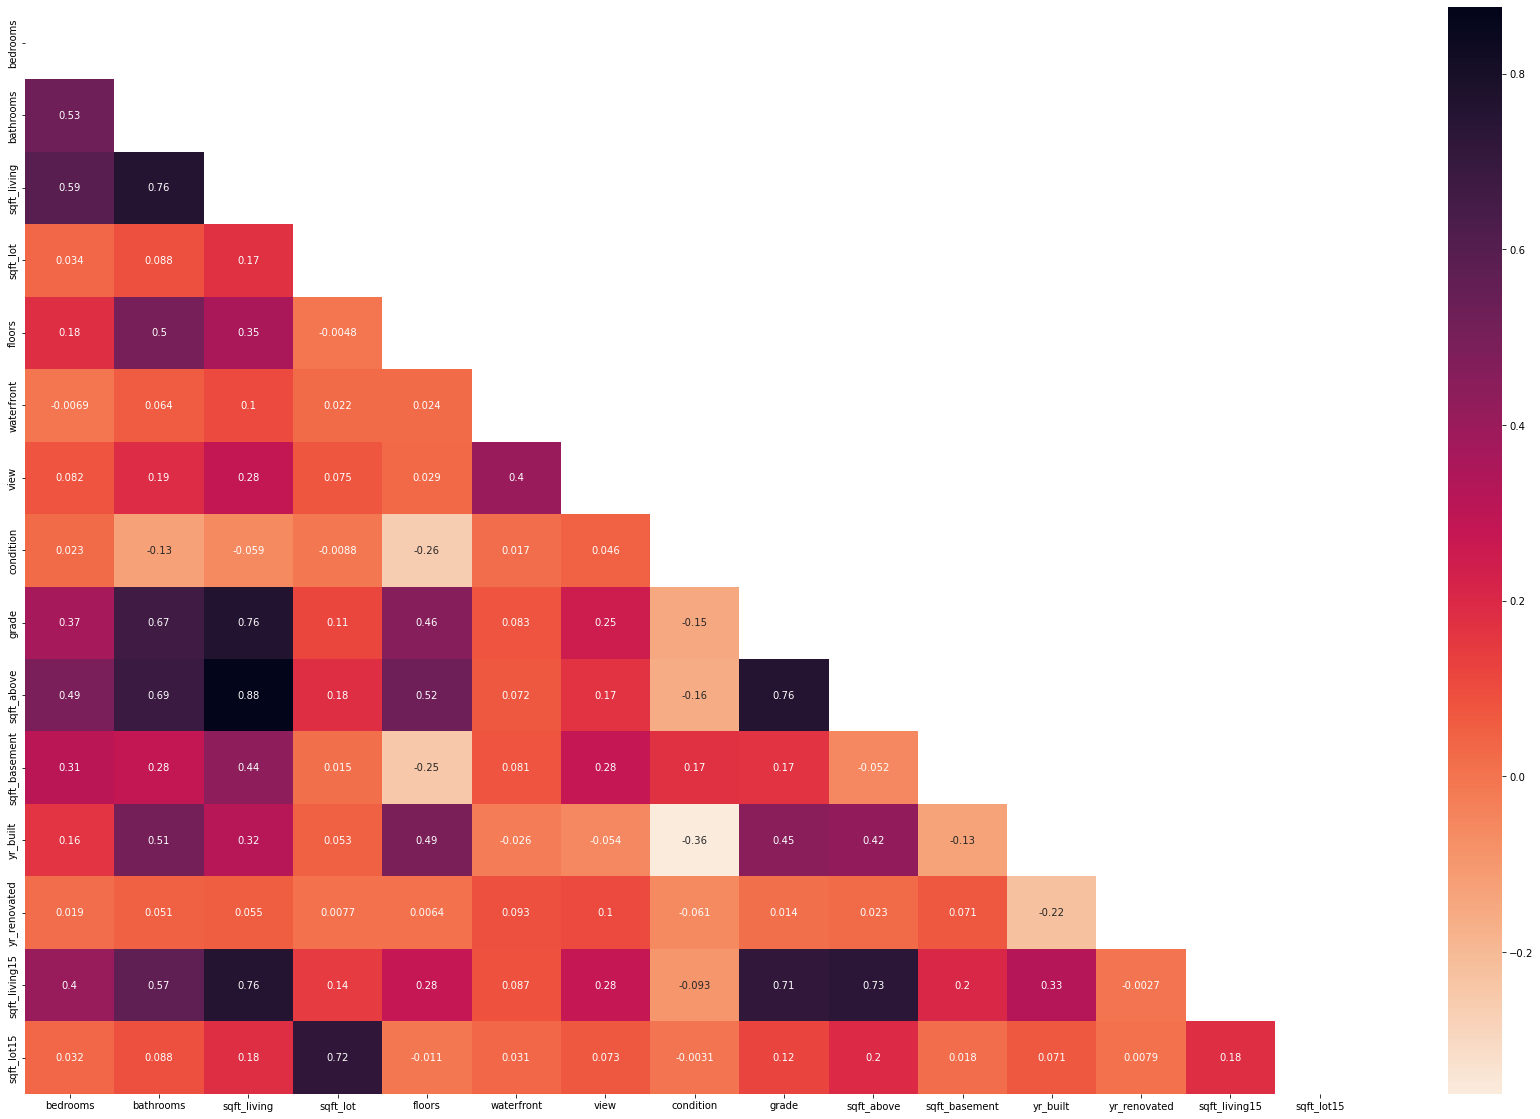

In [134]:
cmap = sns.cm.rocket_r  ## for reversing the colors
mask=np.zeros_like(work_copy._get_numeric_data().corr())
mask[np.triu_indices_from(mask)]=True
fig, ax=plt.subplots(figsize=(30, 20))
ax=sns.heatmap(work_copy._get_numeric_data().corr(), mask=mask, annot=True,cmap=cmap)
plt.show()

### **Data description:** 

> id -> will be removed as not mandatory
>
> bedrooms -> need adjustments as max 33 could be an outlayer, without -> normal distributed
>
> bathrooms -> max 8 needs to check, if its fits with connected sqft range ->
>
> sqft_living -> maybe recalculated in square meter to fit better in european perspective
>
> sqft_lot -> similar to sqft_living
>
> floors -> maybe changable to ordonal categorical
>
> waterfront -> set to categorical 
>
> view -> needs review why min to 75% is zero with an max of 4
>
> condition -> transform to ordonal categorical 0-5
>
> grade -> as descripted typical ordonal categorical 0-13
>
> sqft_above -> similar to sqft_living
>
> sqft_basement -> similar to sqft_living
> - as sqft_basement looks without zero numbers as normal distributed
> - ***ToDo:*** drop zero values from this column
> - create category 'has_basement'
> - fill all 'has_basement' where basement is included
>
> yr_build -> use as number or could be ordonal category when binning with steps e.g 5 years 1900-1905 ....
>
> zip code, lat and long -> skipt or could binning or clustered to regions 
>
> sqft_living15 and sqft_lot15 represents the average living and lot sqft of the closest 15 neiboorhouses





In [116]:
# drop first not need data
work_copy.drop(columns=['id', 'date', 'zipcode', 'lat', 'long'], inplace=True)
#work_copy.drop(columns='sqft_above', inplace=True)
#work_copy.drop(columns=['id', 'date', 'sqft_lot', 'floors', 'waterfront', 'condition', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_lot15'], inplace=True)

In [117]:
work_copy.describe()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,price
count,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,2.159700e+04
mean,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007547,0.234292,3.409825,7.657915,1788.596842,291.725008,1970.999676,84.464787,1986.620318,12758.283512,5.402966e+05
std,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086549,0.766390,0.650546,1.173200,827.759761,442.667800,29.375234,401.821438,685.230472,27274.441950,3.673681e+05
min,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,399.000000,651.000000,7.800000e+04
25%,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,1490.000000,5100.000000,3.220000e+05
50%,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,1840.000000,7620.000000,4.500000e+05
75%,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,2360.000000,10083.000000,6.450000e+05
max,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,6210.000000,871200.000000,7.700000e+06


### First Approach with unfilterd data

In [118]:
work_copy =  work_copy[work_copy['bedrooms'] != 33]

In [119]:
label = work_copy['price']
work_copy.drop(columns='price', inplace=True)

In [148]:
x_train, x_test, y_train, y_test = train_test_split(work_copy, label, test_size= 0.2, random_state= 42)

In [149]:
x_train.describe()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
count,17276.000000,17276.000000,17276.000000,1.727600e+04,17276.000000,17276.000000,17276.000000,17276.000000,17276.000000,17276.000000,17276.000000,17276.000000,17276.000000,17276.000000,17276.000000
mean,3.375492,2.113742,2082.366694,1.507497e+04,1.493720,0.007699,0.233098,3.411091,7.655592,1789.612931,292.753762,1970.885159,83.533630,1986.343887,12729.561878
std,0.904761,0.767417,918.701602,4.143691e+04,0.539527,0.087405,0.767816,0.652211,1.169035,826.413302,444.119491,29.391059,399.720672,684.204703,26814.404676
min,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,399.000000,651.000000
25%,3.000000,1.687500,1424.250000,5.050000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,1490.000000,5100.000000
50%,3.000000,2.250000,1920.000000,7.600000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1570.000000,0.000000,1975.000000,0.000000,1840.000000,7620.000000
75%,4.000000,2.500000,2550.000000,1.071025e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,570.000000,1997.000000,0.000000,2360.000000,10083.250000
max,11.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,6210.000000,871200.000000


In [150]:
scaler_train = StandardScaler().fit(x_train)

scaler_train.transform(x_train)
#scaler_train.transform(x_test)


array([[ 0.69026638, -0.14821784, -0.6992317 , ..., -0.20898606,
        -1.00315556, -0.3225808 ],
       [-0.41502994, -0.47399537, -0.71011694, ..., -0.20898606,
        -0.98853963, -0.10627289],
       [ 0.69026638,  0.82911475,  1.12948898, ..., -0.20898606,
         1.77387152, -0.28826989],
       ...,
       [ 0.69026638, -0.79977289, -0.60126452, ..., -0.20898606,
        -0.68160506, -0.15773926],
       [-2.62562256, -1.77710548, -1.85306737, ..., -0.20898606,
        -1.19316268,  0.08467478],
       [ 0.69026638,  0.50333722,  0.73217764, ..., -0.20898606,
         1.21846611,  0.00378308]])

In [151]:
model = LinearRegression()

model.fit(x_train, y_train)

LinearRegression()

In [152]:
y_pred = model.predict(x_test)

In [153]:
x_train = sm.add_constant(x_train) # adding a constant
model = sm.OLS(list(y_train), x_train).fit()

print_model = model.summary()
print_model

/opt/anaconda3/envs/DA_Enviroment/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.658
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     2370.
Date:                Mon, 15 Nov 2021   Prob (F-statistic):               0.00
Time:                        13:46:11   Log-Likelihood:            -2.3669e+05
No. Observations:               17276   AIC:                         4.734e+05
Df Residuals:                   17261   BIC:                         4.735e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          6.274e+06   1.54e+05     40.751      0.000    5.97e+06    6.58e+06
bedrooms      -4.299e+04   2359.203    -18.224      0.000   -4.76e+04   -3.84e+04
bathrooms      4.779e+04   3942.000     12.123      0.000    4.01e+04    5.55e+04
sqft_living     109.3104      2.758     39.628      0.000     103.904     114.717
sqft_lot          0.0019      0.055      0.033      0.973      -0.107       0.110
floors         2.796e+04   4235.464      6.601      0.000    1.97e+04    3.63e+04
waterfront     5.619e+05   2.07e+04     27.208      0.000    5.21e+05    6.02e+05
view           4.245e+04   2540.988     16.705      0.000    3.75e+04    4.74e+04
condition      2.158e+04   2779.248      7.766      0.000    1.61e+04     2.7e+04
grade          1.213e+05   2527.775     47.987      0.000    1.16e+05    1.26e+05
sqft_above       48.5386      2.642     18.373      0.000      43.360      53.717
sqft_basement    60.7718      3.115     19.509      0.000      54.666      66.878
yr_built      -3618.4525     78.902    -45.860      0.000   -3773.109   -3463.796
yr_renovated      9.8964      4.388      2.255      0.024       1.296      18.497
sqft_living15    30.1774      4.053      7.446      0.000      22.233      38.122
sqft_lot15       -0.6561      0.086     -7.596      0.000      -0.825      -0.487
==============================================================================
Omnibus:                    13105.270   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           944701.955
Skew:                           3.052   Prob(JB):                         0.00
Kurtosis:                      38.709   Cond. No.                     1.03e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.06e-21. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [126]:
type(work_copy._get_numeric_data())

pandas.core.frame.DataFrame

In [154]:
result=pd.DataFrame({"y_test":y_test,"y_pred":y_pred})


<AxesSubplot:xlabel='y_pred', ylabel='y_test'>

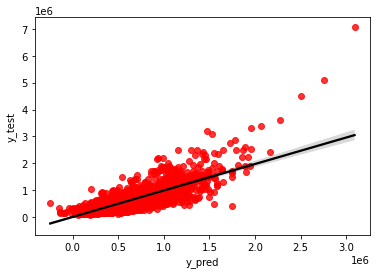

In [155]:
sns.regplot(x='y_pred',y='y_test', data=result, scatter_kws={"color": "red"}, line_kws={"color": "black"})